<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Task 3: Load in the Dataset in your Jupyter Notebook


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

In [5]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [6]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 4: Generate Descriptive Statistics and Visualizations

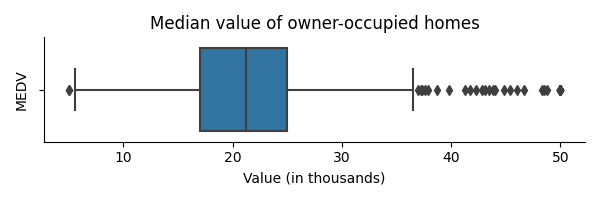

<Figure size 600x200 with 0 Axes>

In [7]:
ax = sns.catplot(x='MEDV', data=boston_df, kind='box')
ax.figure.set_size_inches(6,2)
plt.title('Median value of owner-occupied homes')
plt.xlabel('Value (in thousands)')
plt.ylabel('MEDV')
plt.tight_layout()
plt.show()

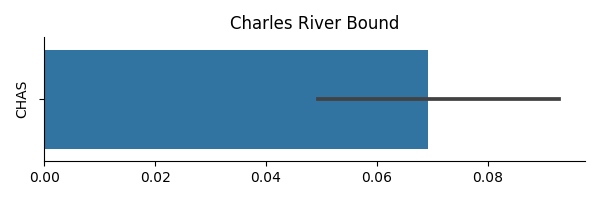

<Figure size 600x200 with 0 Axes>

In [8]:
ax = sns.catplot(x='CHAS', kind='bar', data=boston_df)
ax.figure.set_size_inches(6,2)
plt.title('Charles River Bound')
plt.xlabel('')
plt.ylabel('CHAS')
plt.tight_layout()
plt.show()

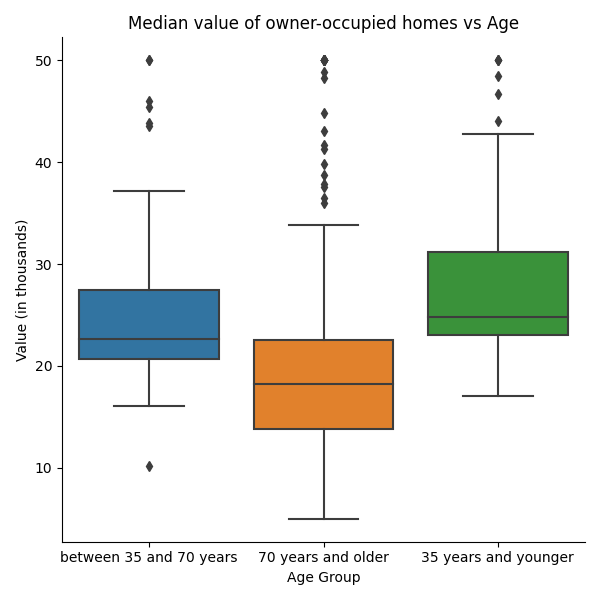

<Figure size 600x600 with 0 Axes>

In [9]:
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_GROUP'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GROUP'] = '70 years and older'

ax = sns.catplot(x='AGE_GROUP', y='MEDV', data=boston_df, kind='box')
ax.figure.set_size_inches(6,6)
plt.title('Median value of owner-occupied homes vs Age')
plt.xlabel('Age Group')
plt.ylabel('Value (in thousands)')
plt.tight_layout()
plt.show()

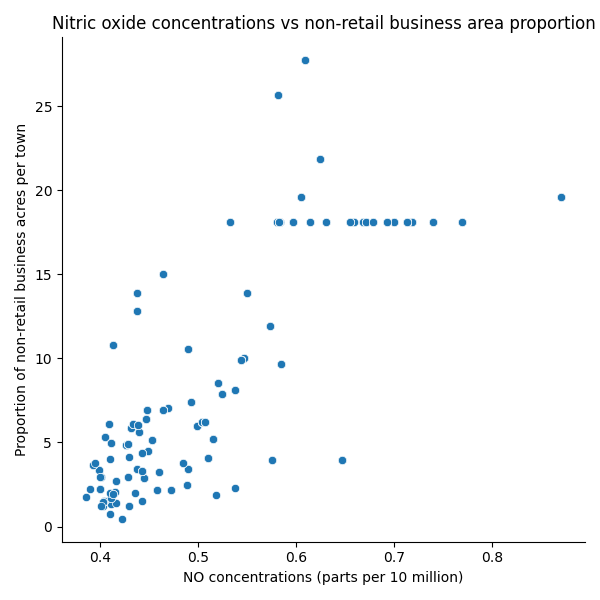

<Figure size 600x600 with 0 Axes>

In [10]:
ax = sns.relplot(x='NOX', y='INDUS', data=boston_df)
ax.figure.set_size_inches(6,6)
plt.title('Nitric oxide concentrations vs non-retail business area proportion')
plt.xlabel('NO concentrations (parts per 10 million)')
plt.ylabel('Proportion of non-retail business acres per town')
plt.tight_layout()
plt.show()

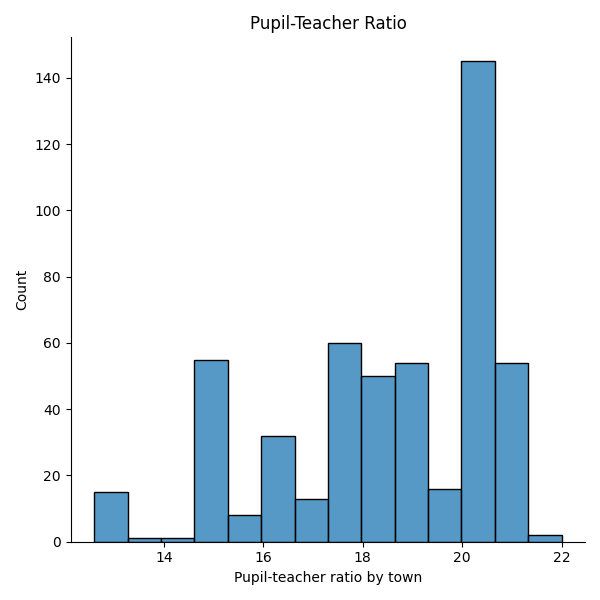

<Figure size 600x600 with 0 Axes>

In [11]:
ax = sns.displot(x='PTRATIO', data=boston_df)
ax.figure.set_size_inches(6,6)
plt.title('Pupil-Teacher Ratio')
plt.xlabel('Pupil-teacher ratio by town')
plt.tight_layout()
plt.show()

# Task 5

#### Is there a significant difference in median value of houses bounded by the Charles river or not?

H<sub>0</sub>: There is no significant difference in median value of houses bounded by the Charles river or not.

In [12]:
stats.ttest_ind(boston_df['MEDV'][boston_df['CHAS'] == 0.0],
                boston_df['MEDV'][boston_df['CHAS'] == 1.0])

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

P-value is less than 0.05 so we reject H<sub>0</sub> and conclude that there is significat difference in median value of houses bounded by Charles river or not.

#### Is there a difference in Median values of houses for each proportion of owner occupied units built prior to 1940?

H<sub>0</sub>: There is no difference in Median values of houses for each proportion of owner occupied units built prior to 1940.

In [13]:
stats.f_oneway(boston_df['MEDV'][boston_df['AGE_GROUP'] == '35 years and younger'],
               boston_df['MEDV'][boston_df['AGE_GROUP'] == 'between 35 and 70 years'],
               boston_df['MEDV'][boston_df['AGE_GROUP'] == '70 years and older'])

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

P-value is less than 0.05 so we reject H<sub>0</sub> and conclude that there is significat difference in median value of houses for each proportion of owner occupied units built prior to 1940

#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

H<sub>0</sub>: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

In [14]:
stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])

(0.7636514469209189, 7.913361061211254e-98)

P-value is less than 0.05 so we reject H<sub>0</sub> and conclude that there is relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

#### What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?

H<sub>0</sub>: There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.

In [15]:
X = boston_df['DIS'].values
Y = boston_df['MEDV'].values

X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 29 Dec 2022   Prob (F-statistic):           1.21e-08
Time:                        15:21:46   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
x1             1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

P-value is less than 0.05 so we reject H<sub>0</sub> and conclude that there is impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes. Each additional unit of weighted distance to the five Boston employment centres increase the median value of owner occupied homes by 1.0916 unit